<a href="https://colab.research.google.com/github/hanghae-plus-AI/AI-1-soyoungcareer/blob/main/week1/Chapter1_1_%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 과제 수행 순서
    1. testset, testloader 추가
    2. `nn.CrossEntropyLoss` 적용
        1. output demension 수정
        2. loss 계산 수정
    3. 정확도 plot

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4169189.82it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 135182.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1089346.80it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4305204.24it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



60000
torch.Size([1, 28, 28]) 5


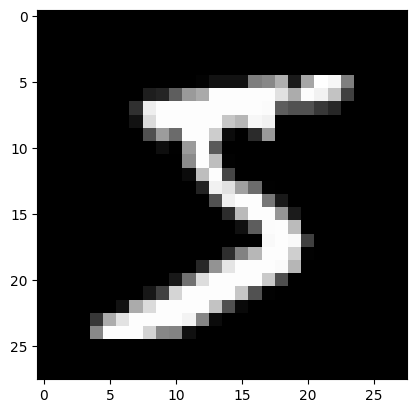

In [ ]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [ ]:
batch_size = 256
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


In [ ]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)  # 출력 차원 10으로 변경 (0~9)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)    # 데이터 평탄화
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)    # 활성화 함수는 마지막 층에서 사용하지 않음

    return x


model = Model(28 * 28 * 1, 1024)

In [ ]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

Epoch   0 | Loss: 540.0245952606201
Epoch   1 | Loss: 536.4269711971283
Epoch   2 | Loss: 532.7391064167023
Epoch   3 | Loss: 528.854058265686
Epoch   4 | Loss: 524.6445200443268
Epoch   5 | Loss: 520.000307559967
Epoch   6 | Loss: 514.7938523292542
Epoch   7 | Loss: 508.8836874961853
Epoch   8 | Loss: 502.11131978034973
Epoch   9 | Loss: 494.331604719162
Epoch  10 | Loss: 485.37314772605896
Epoch  11 | Loss: 475.05216217041016
Epoch  12 | Loss: 463.2356061935425
Epoch  13 | Loss: 449.74945616722107
Epoch  14 | Loss: 434.5713608264923
Epoch  15 | Loss: 417.67008352279663
Epoch  16 | Loss: 399.3040977716446
Epoch  17 | Loss: 379.7314866781235
Epoch  18 | Loss: 359.5759161710739
Epoch  19 | Loss: 339.33948290348053
Epoch  20 | Loss: 319.49274587631226
Epoch  21 | Loss: 300.59810066223145
Epoch  22 | Loss: 282.96209847927094
Epoch  23 | Loss: 266.7689106464386
Epoch  24 | Loss: 252.00188767910004
Epoch  25 | Loss: 238.83008480072021
Epoch  26 | Loss: 226.84833532571793
Epoch  27 | Loss: 2

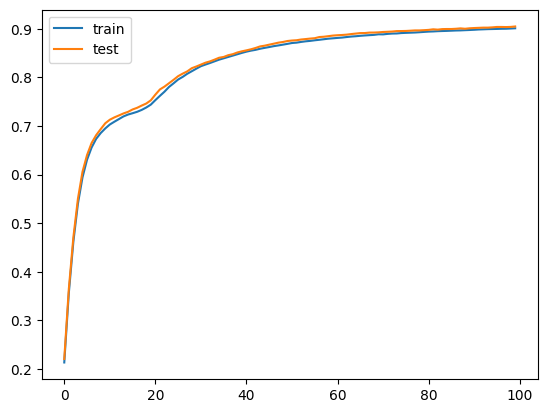

In [ ]:
import numpy as np

# 정확도 측정 함수
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

# 시각화 함수 정의
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


train_accuracies = []
test_accuracies = []

n_epochs = 100

for epoch in range(n_epochs):
    total_loss = 0.

    # 학습 모드
    model.train()
    for data in trainloader:
        model.zero_grad()
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        loss = criterion(preds, labels)  # 손실 계산
        loss.backward()    # 역전파 (손실에 대한 기울기 계산)
        optimizer.step()    # 기울기를 바탕으로 모델의 가중치(파라미터) 업데이트

        total_loss += loss.item()

    print(f"Epoch {epoch:3d} | Loss: {total_loss}")
    train_accuracy = accuracy(model, trainloader)
    train_accuracies.append(train_accuracy)

    # 평가 모드
    model.eval()
    with torch.no_grad():
        test_accuracy = accuracy(model, testloader)
        test_accuracies.append(test_accuracy)

# 3. 정확도 plot
plot_acc(train_accuracies, test_accuracies)

In [ ]:
idx = 0

# x = trainset[idx][0][None]  # (1, 1, 28, 28)
# x = x.to('cuda')

# print(model(x))
# print(trainset[idx][1])

x = testset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cuda')

print(model(x))
print(testset[idx][1])

tensor([[ 0.3285, -4.5035, -0.2875,  1.9135, -2.2832, -0.8699, -6.6858,  8.8521,
         -0.7146,  3.7176]], device='cuda:0', grad_fn=<AddmmBackward0>)
7
